# Redes Neurais para modelagem de preços de casas

*Seattle* é a cidade mais populosa do estado de Washington, nos Estados Unidos, com cerca de 4 milhões de habitantes. É uma cidade localizada na costa da oceano Pacífico e está muito próxima de *Vancouver* (Canadá). A cidade possui clima úmido, com frequência de neblinas e chuvas é alta. O setor imobiliário da cidade é um dos maiores do país e conforme essa [notícia](https://www.seattlepi.com/news/article/Seattle-direct-commercial-real-estate-investments-15014247.php) a cidade está classificada entre as 20 principais cidades em investimento imobiliário comercial direto no ano de 2019, na 17° colocação. O grande desafio de cada mercado, seja lá qual for, é a modelagem dos preços nos mercados.

Modelar o preço de um produto é um desafio, pois o preço, além de ser uma unidade para referenciar trocas, também é serve para trazer informação do mercado em que o produto está inserido. Uma das formas mais comuns de modelar preços é utilizando as características do produto ou serviço e observar se possuem algum tipo de relacionamento que possa explicar o comportamento do preço. Existem vários métodos fazer essa modelagem, como modelos de *machine learning* e modelos de *deep learning*, mas o objetivo é um só: encontrar um modelo que, uma vez aplicada as *features*, minimize os erros; ou seja, a diferença entre o real e o predito seja a menor possível.

Para esse projeto irei utilizar uma rede neural artificial, que é um método de *deep learning*, para modelar esses dados.

## Dados

Os dados foram obtidos na plataforma *Kaggle* e estão anexadas na pasta desse projeto no meu *Github*. Abaixo podemos ver a nossa lista de *features* do *dataset*.

1) *id* : uma notação para uma casa;

2) *date* : a data em que a casa foi vendida;

3) *price* : o preço da casa e nossa variável alvo;

4) *bedrooms* : Número de quartos na casa;

5) *bathrooms* : Número de banheiros nos quartos;

6) *sqft_living* : metragem quadrada da casa;

7) *sqft_lot* : metragem quadrada do lote;

8) *Pisos* : Total de pisos (níveis) na casa;

9) *waterfront* : casa com vista para a beira-mar;

10) *view* : foi vista ?;

11) *condition* : quão boa é a condição geral;

12) *grade* : nota geral dada à unidade habitacional;

13) *sqft_above* : metragem quadrada da casa além do porão;

14) *sqft_basement* : metragem quadrada do porão;

15) *yr_built* : Ano de construção;

16) *yr_renovated* : ano em que a casa foi renovada;

17) *zipcode* : código postal;

18) *lat* : coordenada de latitude;

19) *long* : coordenada de longitude;

20) *sqft_living15* : Área da sala de estar em 2015 (implica algumas reformas) Isso pode ou não ter afetado o tamanho do lote;

21) *sqft_lot15* : área lotSize em 2015 (implica algumas renovações);

## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score, train_test_split
from keras.wrappers.scikit_learn import KerasRegressor

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

## Importando os dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seattle.csv to seattle.csv


## Análise dos dados

Atribuindo a base de dados a uma variável e observando suas 5 primeiras linhas.

In [ ]:
casa = pd.read_csv('seattle.csv')
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


últimas 5 linhas.

In [ ]:
casa.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Dimensão da nossa base de dados: 21613 linhas e 21 colunas

In [ ]:
casa.shape

(21613, 21)

Vemos que nossa base não possui valores faltantes.

In [ ]:
casa.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Informações sobre a base de dados.

In [ ]:
casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Correlação das *features* com a variável *target*.

A correlação é uma métrica que varia de 0 a 1 e nos mostra quais variáveis podem estar mais relacionadas conjuntamente. Vemos que temos algumas *features* que possuem uma correlação alta com os preços das casa, como : *sqft_living* (correlação de 0.702035, uma correlação alta), *grade* (correlação de 0.667434, também é uma correlação alta), *sqft_above* (correlação de 0.605567) e *sqft_living15* (correlação de 0.585379). 

In [ ]:
casa.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

A métrica anterior leva em consideração variáveis apenas a relação linear entre as variáveis, então podemos usar a correlação de *spearman* e analisar se há uma relação não linear.

Aqui vemos que as variáveis anteriores tiveram os valores um pouco menores, porém ainda são as mais correlacionadas com os preços das casas.

In [ ]:
casa.corr('spearman')['price']

id               0.004178
price            1.000000
bedrooms         0.344652
bathrooms        0.497160
sqft_living      0.644191
sqft_lot         0.074939
floors           0.322346
waterfront       0.115089
view             0.293931
condition        0.018490
grade            0.658215
sqft_above       0.541752
sqft_basement    0.251704
yr_built         0.102037
yr_renovated     0.101875
zipcode         -0.008735
lat              0.456409
long             0.063537
sqft_living15    0.572290
sqft_lot15       0.062766
Name: price, dtype: float64

Tabela estatística da base de dados.

In [ ]:
casa.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Alguns valores mínimos estão com os valores zerados, como *bedrooms*, *bathrooms*, *waterfront*, *view*, *sqft_basement* e *yr_renovated*. Esses valores zerados podem indicar a ausência de um desses componentes da casa.

Alguns desses fazem sentido, como *waterfront*, *view*, *sqft_basement* e *yr_renovated*, mas *bedrooms* e *bathrooms* não faz. Ocorre que é difícil de pensar em uma casa que não tenha quartos nem banheiros.

In [ ]:
casa.describe().T['min']

id               1.000102e+06
price            7.500000e+04
bedrooms         0.000000e+00
bathrooms        0.000000e+00
sqft_living      2.900000e+02
sqft_lot         5.200000e+02
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       2.900000e+02
sqft_basement    0.000000e+00
yr_built         1.900000e+03
yr_renovated     0.000000e+00
zipcode          9.800100e+04
lat              4.715590e+01
long            -1.225190e+02
sqft_living15    3.990000e+02
sqft_lot15       6.510000e+02
Name: min, dtype: float64

Por esse motivo irei substituir valores zerados pela mediana, que é uma medida de posição bastante usada para imputar valores por ser imune a valores discrepantes (*outliers*).

In [ ]:
lista=['bedrooms','bathrooms']
for i in lista:
    casa[i].replace(0,casa[i].median(),inplace=True)

Observando novamente os valores mínimos podemos ver que os valores zerados foram imputados com sucesso.

In [ ]:
casa.describe().T['min']

id               1.000102e+06
price            7.500000e+04
bedrooms         1.000000e+00
bathrooms        5.000000e-01
sqft_living      2.900000e+02
sqft_lot         5.200000e+02
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       2.900000e+02
sqft_basement    0.000000e+00
yr_built         1.900000e+03
yr_renovated     0.000000e+00
zipcode          9.800100e+04
lat              4.715590e+01
long            -1.225190e+02
sqft_living15    3.990000e+02
sqft_lot15       6.510000e+02
Name: min, dtype: float64

## Análise exploratória dos dados

Vamos analisar os dados e ver que informações podemos extrar da nossa base de dados. Vamos fazer algumas perguntas (hipóteses) e tentar respondê-las com os nossos dados:

1) Casas com maiores áreas são mais caras ?

2) Casas com mais banheiros e mais quartos são mais caras ?

3) Qual a relação entre o preço das casas e o seu ano de construção ?

4) Os níveis das casas, suas condições e as notas tem relação com o preço ?

5) Há diferença entre o preço de casas com e sem vista para o mar ?

Podem ver que sempre as nossas hipóteses estão relacionadas com o preço, que é a nossa variável alvo e que queremos conhecer seu comportamento.

#### Hipótese 1

A primeira pergunta usaremos gráficos *scatterplot* para visualizar a relação. Temos 6 *features* que tratam da área de componentes da casa: *sqft_living*, *sqft_lot*, *sqft_above*, *sqft_basement*, *sqft_living15* e *sqft_lot15*.

Abaixo estão os gráficos dessas *features* comparadas aos preços das casas e dessas, as que mostraram parecer ter uma relação linear com a variável *target* *price* foram *sqft_living*, *sqft_above* e *sqft_living15*. Ou seja a medida que há um crescimento no valor dessas características, há um aumento no valor das casas. Então essas *features* podem ser úteis para a modelagem dos preços das casas.

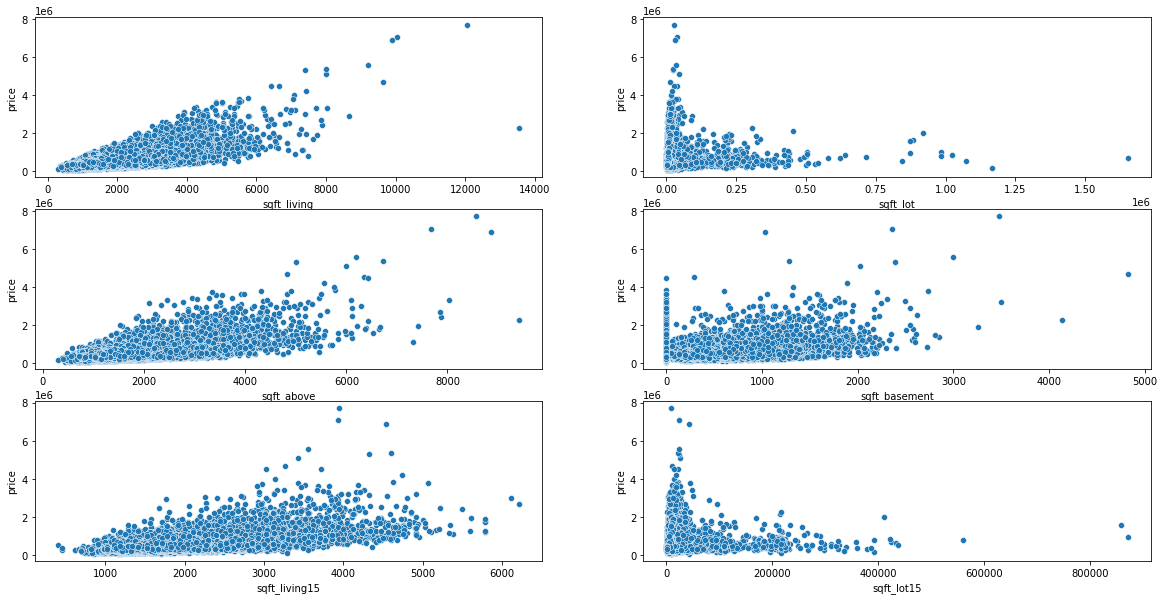

In [ ]:
fig,ax = plt.subplots(3,2, figsize=(20,10))
sns.scatterplot(x=casa['sqft_living'],y=casa['price'],ax=ax[0][0]);
sns.scatterplot(x=casa['sqft_lot'],y=casa['price'],ax=ax[0][1]);
sns.scatterplot(x=casa['sqft_above'],y=casa['price'],ax=ax[1][0]);
sns.scatterplot(x=casa['sqft_basement'],y=casa['price'],ax=ax[1][1]);
sns.scatterplot(x=casa['sqft_living15'],y=casa['price'],ax=ax[2][0]);
sns.scatterplot(x=casa['sqft_lot15'],y=casa['price'],ax=ax[2][1]);

#### Hipótese 2

Para respondermos essa iremos usar gráficos do tipo barra. Vemos que para banheiros há uma tendência de crescimento dos preços a medida que o número de banheiros nos quartos aumentam . Já para a *feature bedrooms* até 8 quartos os preços são crescentes e depois a média declina.

Podemos perceber que há um *outlier*: uma casa com 33 quartos.

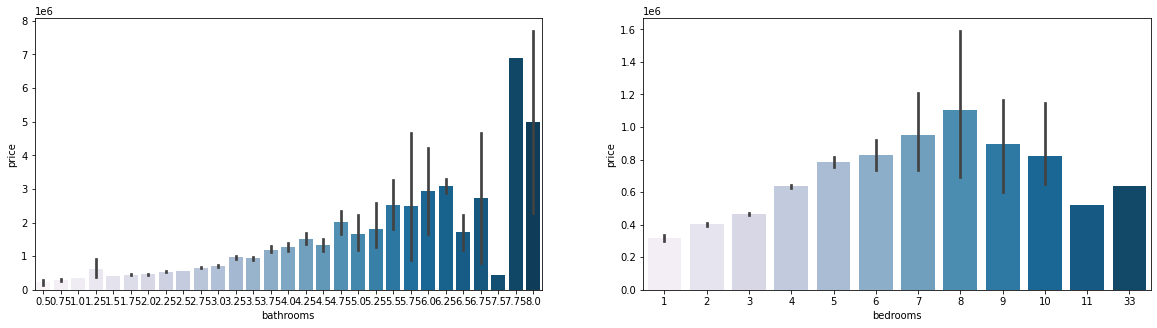

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='bathrooms', y='price', data=casa, ax=ax[0], palette='PuBu')
sns.barplot(x='bedrooms', y='price', data=casa, ax=ax[1],palette='PuBu');

#### Hipótese 3

Casas construídas de 1900 até 1943 aparentam ter uma tendência do preço médio. Porém podemos ver no gráfico que casas construídas mais recentemente possuem preços médios maiores.

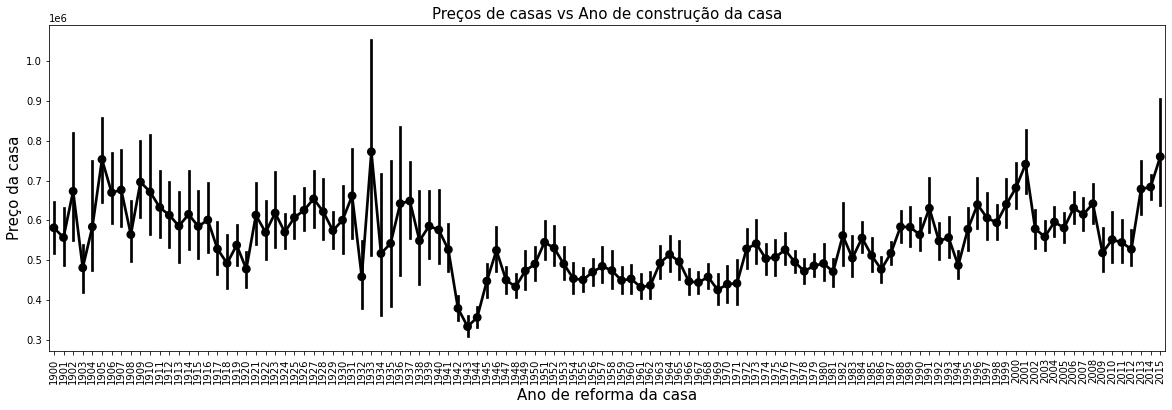

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Preços de casas vs Ano de construção da casa',size=15)
sns.pointplot(x='yr_built', y='price',data=casa,color='black')
plt.xlabel('Ano de reforma da casa',size=15)
plt.ylabel('Preço da casa',size=15)
plt.xticks(rotation=90);

#### Hipótese 4

Vemos que a maioria das casas possuem 1 ou 2 níveis. A maior parte das casas possuem condições de regulares a ótimas.


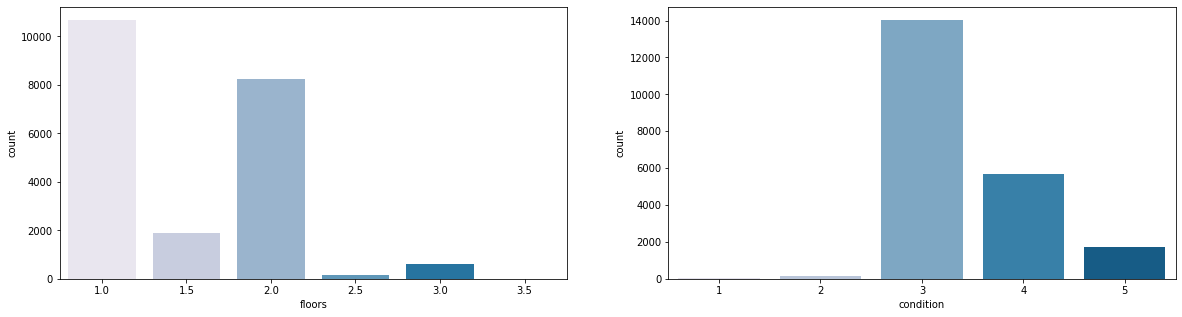

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(x='floors', data=casa,ax=ax[0],palette='PuBu')
sns.countplot(x='condition', data=casa,ax=ax[1],palette='PuBu');

Mas vemos que o casas com mais níveis, tem valores médios maiores. Casas em condições mais elevadas possuem preços médios maiores.

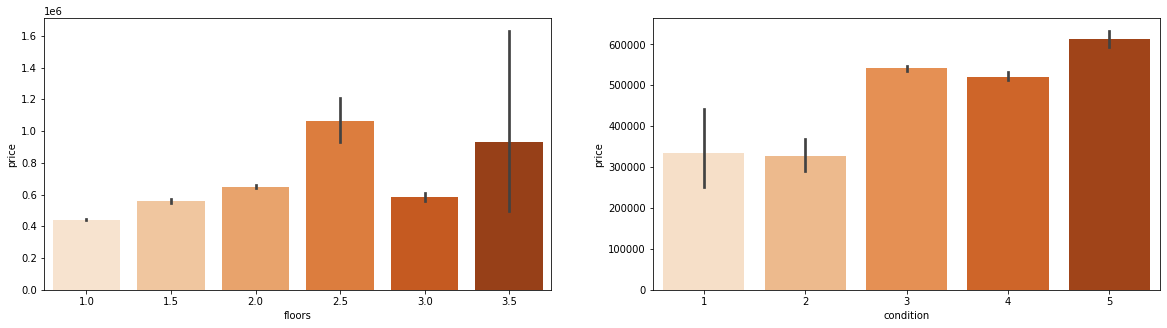

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='floors',y='price', data=casa,ax=ax[0],palette='Oranges')
sns.barplot(x='condition',y='price', data=casa,ax=ax[1],palette='Oranges');

A medida que as notas aumentam os preços também aumentam e note que o comportamento aparenta ser exponencial. Então podemos concluir que as *features* apresentadas aqui possuem uma relação com os preços das casas.

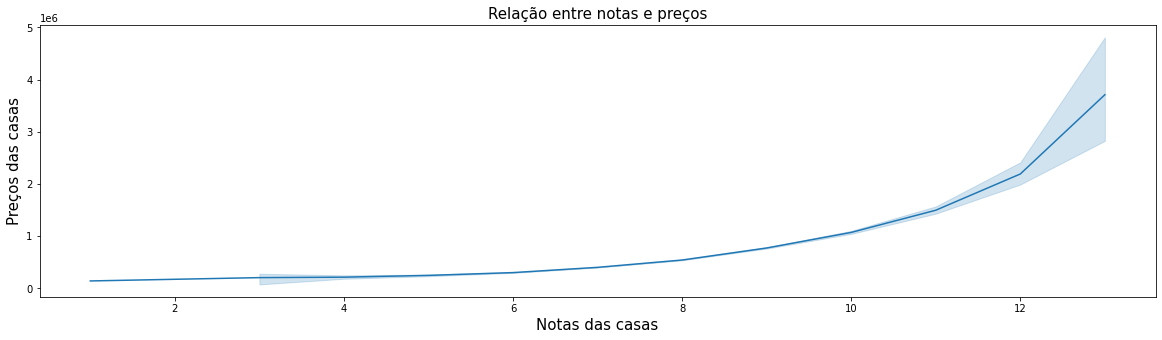

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='grade',y='price',data=casa)
plt.xlabel('Notas das casas', size=15)
plt.ylabel('Preços das casas', size=15)
plt.title('Relação entre notas e preços',size=15);

#### Hipótese 5

Por fim, nossa última hipótese pode ser respondida abaixo: mesmo o número de casas com vista para o mar sendo menor, seus preços médios são maiores que os das casas sem vista para o mar.

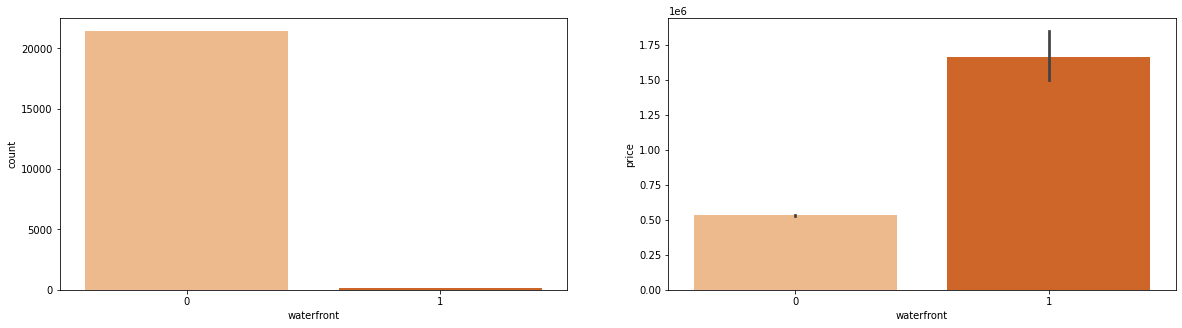

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(x='waterfront', data=casa,ax=ax[0],palette='Oranges')
sns.barplot(x='waterfront',y='price', data=casa,ax=ax[1],palette='Oranges');

## Seleção de *Features*

Vimos anteriormente que temos 21 colunas e algumas colunas não nos trazem informações relevantes ou não são apropriadas para aplicarmos ao modelo. Por exemplo: *id*, *date*, *yr_built*, *yr_renovated*, *zipcode*, *lat* e *long*.

Essas colunas serão eliminadas.

In [ ]:
casa=casa.drop(['id','date','yr_built','yr_renovated','zipcode','lat','long'],axis=1)

Agora temos 14 *features*.


In [ ]:
casa.shape

(21613, 14)

Temos ainda um número elevado de *features*, por isso podemos selecionar as mais adequadas para o nosso problema de regressão por meio da correlação.

In [ ]:
casa.corr()['price']

price            1.000000
bedrooms         0.308868
bathrooms        0.525714
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Vamos ver quais as *features* que passam dos 30% de correlação com o preço.

In [ ]:
casa.corr()['price']>0.3

price             True
bedrooms          True
bathrooms         True
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view              True
condition        False
grade             True
sqft_above        True
sqft_basement     True
sqft_living15     True
sqft_lot15       False
Name: price, dtype: bool

Podemos então selecionar essas variáveis.

In [ ]:
casa2=casa[['bedrooms','bathrooms','sqft_living','view','grade','sqft_above','sqft_basement','sqft_living15','price']]

Saímos de 20 características para apenas 9.

In [ ]:
casa2.shape

(21613, 9)

Vamos visualizar essa nova base de dados.

In [ ]:
casa2.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15,price
0,3,1.00,1180,0,7,1180,0,1340,221900
1,3,2.25,2570,0,7,2170,400,1690,538000
2,2,1.00,770,0,6,770,0,2720,180000
3,4,3.00,1960,0,7,1050,910,1360,604000
4,3,2.00,1680,0,8,1680,0,1800,510000


## Separando dados de treino e teste

Aqui vamos separar uma porção dos dados para treinar a rede neural e outra para avaliar o desempenho das previsões.

Vamos atribuir à variáveis as *features* e o *target*, após isso vamos fazer o *split* dos dados.

In [ ]:
X=casa2.drop('price',axis=1)
y=casa2.price

Separação do dados de treino e teste.

In [ ]:
X_treino, X_teste, y_treino, y_teste=train_test_split(X,y,random_state=42,test_size=0.2)

Algumas *features* que possuem valores inteiros, por esse motivo é mais adequado aplicar uma padronização dessas *features*.

In [ ]:
lista=['bedrooms','view','grade','sqft_basement']
for i in lista:
  X_treino[i]=(X_treino[i]-X_treino[i].mean())/(X_treino[i].std())
  X_teste[i]=(X_teste[i]-X_teste[i].mean())/(X_teste[i].std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Base de treino.

In [ ]:
X_treino.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
6325,-0.397934,1.75,1780,-0.305908,1.150210,1780,-0.656291,2750
13473,-1.474829,1.00,1000,-0.305908,-1.413115,800,-0.200427,1270
17614,-0.397934,1.00,1080,-0.305908,-1.413115,990,-0.451152,1170
16970,-0.397934,2.25,2090,-0.305908,-0.558673,1280,1.189959,1800
20868,-1.474829,2.50,1741,-0.305908,0.295768,1446,0.016109,2090


Base de teste.

In [ ]:
X_teste.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
735,0.670005,2.25,2070,-0.305226,0.276839,2070,-0.668568,2390
2830,1.759707,3.00,2900,-0.305226,0.276839,1830,1.670668,2370
4106,0.670005,2.50,3770,2.244518,2.785798,3770,-0.668568,3710
16218,-0.419698,3.50,4560,2.244518,3.622118,4560,-0.668568,4050
19964,-0.419698,2.50,2550,-0.305226,1.113158,2550,-0.668568,2250


## Aplicação do modelo de Redes Neurais

Vamos agora construir nosso modelo de rede neural. Nesse modelo usarei 3 camadas : uma de entrada, uma oculta e uma de saída. Na camada de entrada aplicarei 5 neurônios ($\frac{8+1}{2}$, onde 8 se referem ao número de *features*) e a função de aticação será a *ReLu*. A camada oculta também terá 5 neurônios e a função de ativação *ReLu*. E a camada de saída terá apenas um neurônio e a função de ativação será a *linear* (que em tese não faz nada).

A métrica que usarei será o *mean absolute error* e o otimizador da rede neural será o *adam*.

In [ ]:
regressor=Sequential()
regressor.add(Dense(units=5, activation='relu',input_dim=8))
regressor.add(Dense(units=5, activation='relu'))
regressor.add(Dense(units=1,activation='linear'))
regressor.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

Agora irei aplicar as bases de treino para treinar a rede neural.

In [ ]:
regressor.fit(X_treino,y_treino, batch_size=300, epochs = 300)

Epoch 1/300
58/58 [==============================] - 0s 1ms/step - loss: 537501.4375 - mean_absolute_error: 537501.4375
Epoch 2/300
58/58 [==============================] - 0s 1ms/step - loss: 537127.5000 - mean_absolute_error: 537127.5000
Epoch 3/300
58/58 [==============================] - 0s 1ms/step - loss: 536618.4375 - mean_absolute_error: 536618.4375
Epoch 4/300
58/58 [==============================] - 0s 1ms/step - loss: 535907.9375 - mean_absolute_error: 535907.9375
Epoch 5/300
58/58 [==============================] - 0s 1ms/step - loss: 534944.8125 - mean_absolute_error: 534944.8125
Epoch 6/300
58/58 [==============================] - 0s 1ms/step - loss: 533679.8750 - mean_absolute_error: 533679.8750
Epoch 7/300
58/58 [==============================] - 0s 1ms/step - loss: 532065.0000 - mean_absolute_error: 532065.0000
Epoch 8/300
58/58 [==============================] - 0s 1ms/step - loss: 530052.5625 - mean_absolute_error: 530052.5625
Epoch 9/300
58/58 [=====================

Gerando as previsões com o modelo.

In [ ]:
prev=regressor.predict(X_teste)

Vamos ver as previsões em formato *dataset*.

In [ ]:
pd.DataFrame(prev)

,0
0,5.389796e+05
1,6.553317e+05
2,9.241311e+05
3,1.077632e+06
4,6.003383e+05
...,...
4318,3.158405e+05
4319,6.346276e+05
4320,5.989114e+05
4321,5.349910e+05


Visualizando graficamente as previsões.

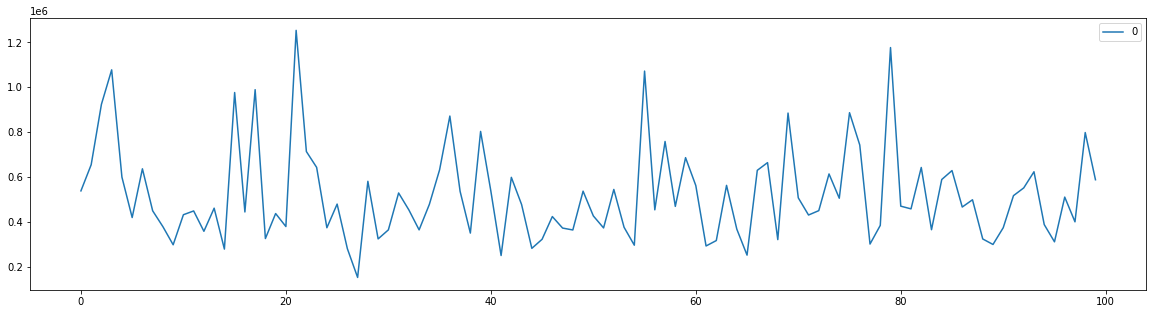

In [ ]:
pd.DataFrame(prev)[:100].plot(figsize=(20,5));

### Comparando real e o predito

Agora irei comparar os resultados gerados com o modelo e os valores reais. Antes irei transformá-los em listas e plotarei os valores.

In [ ]:
x1= regressor.predict(X_teste).tolist()
x2 = y_teste.tolist()

Comparação gráfica.

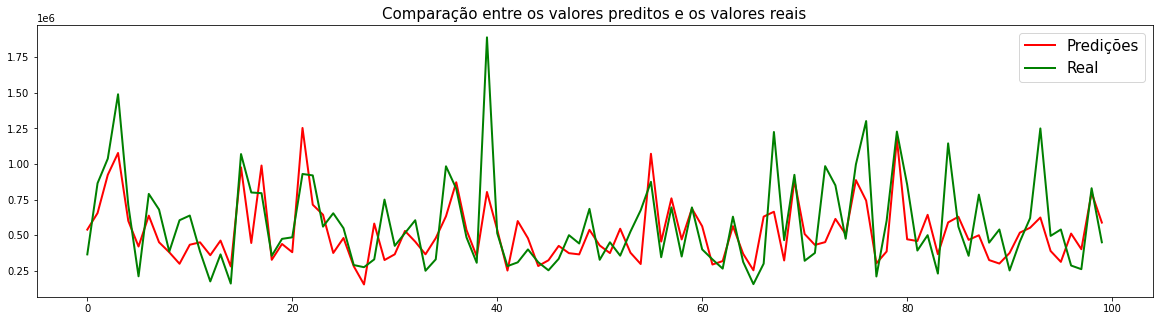

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:100], linewidth=2, color='r')
plt.plot(x2[:100], linewidth=2,color='g')
plt.title('Comparação entre os valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

Abaixo podemos ver as métricas de avaliação. Pode ser visto que o $R^2$ está muito baixo, mostrando que o poder explicativo desse modelo está aquém do esperado.

In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,regressor.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,regressor.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,regressor.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,regressor.predict(X_teste)))

O erro médio absoluto é : 168161.89658512606
O erro médio quadrado é : 83143634279.15294
O erro mediano absoluto é : 115706.0
O R quadrado é : 0.4500235281683058


Podemos também comparar as previsões e os valores reais nos gráfico abaixo. O ideial era que o gráfico abaixo tivesse um comportamento linear 45 graus.

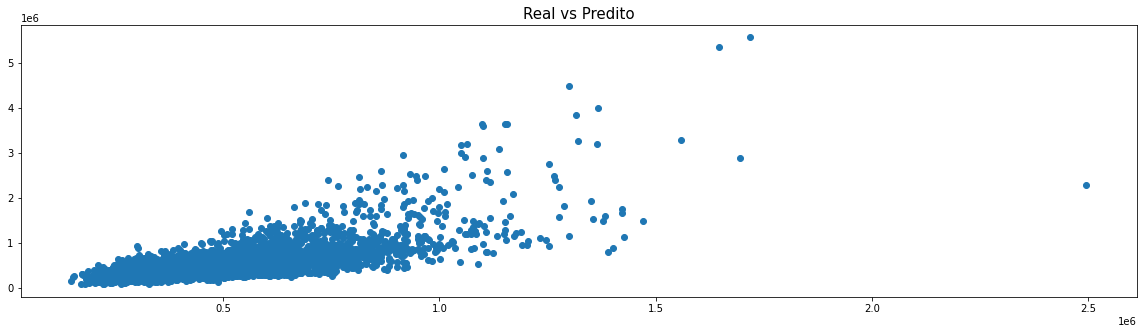

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Real vs Predito",size=15)
plt.scatter(x1,x2);

Sumário do modelo detalhando as suas camadas.

In [ ]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Pesos da rede neural.

In [ ]:
regressor.layers[0].get_weights()

[array([[-1.28500385e+01, -7.46998727e-01, -1.47977471e-02,
         -5.28953671e-02,  1.04907990e-01],
        [ 5.33901405e+00,  3.91913980e-01,  4.61686611e-01,
         -1.90474242e-01, -3.70324850e-02],
        [ 5.61342669e+00,  6.64094537e-02,  1.73148751e-01,
         -6.05596304e-02, -6.23602331e-01],
        [ 1.57667427e+01, -1.15663141e-01,  2.71421611e-01,
         -1.17332339e-01, -4.39426571e-01],
        [ 1.57121944e+01, -7.82349780e-02, -5.70268989e-01,
         -4.61384684e-01, -5.12044787e-01],
        [ 3.50848496e-01,  4.67275865e-02, -2.93040246e-01,
         -4.07061666e-01, -5.55617809e-02],
        [ 1.39316845e+01,  7.43110403e-02,  4.55683470e-02,
          5.44866323e-01, -1.02250993e-01],
        [ 3.60598373e+00, -6.58282995e-01, -4.83260661e-01,
          8.21788907e-02, -3.16709280e-01]], dtype=float32),
 array([ 4.309768  , -0.18361741,  0.        ,  0.        ,  0.        ],
       dtype=float32)]

In [ ]:
regressor.layers[1].get_weights()

[array([[ 4.82305   , -0.39112914, -0.26423615, -0.63426375, -0.27361286],
        [-0.43438113, -0.19762659, -0.12378615,  0.6304054 ,  0.5460195 ],
        [ 0.2678604 , -0.597621  , -0.13120598, -0.5772484 ,  0.29683995],
        [ 0.36741066,  0.62002826, -0.16479117,  0.4713596 , -0.32158116],
        [ 0.08374029, -0.6982854 , -0.6636926 , -0.35694924,  0.16768396]],
       dtype=float32),
 array([3.557923 , 0.       , 0.       , 0.       , 0.0590241],
       dtype=float32)]

In [ ]:
regressor.layers[2].get_weights()

[array([[ 5.3308244 ],
        [-0.77169013],
        [-0.26243377],
        [-0.9018352 ],
        [ 0.08889461]], dtype=float32), array([2.7887206], dtype=float32)]

Agora vamos ver o desempenho do modelo com os dados de treino que foram aplicados nele. 

Vamos gerar as previsões e transformá-las em uma lista, assim como os dados de treino.

In [ ]:
x3= regressor.predict(X_treino).tolist()
x4 = y_treino.tolist()

E compararemos também, de forma gráfica, os resultados.

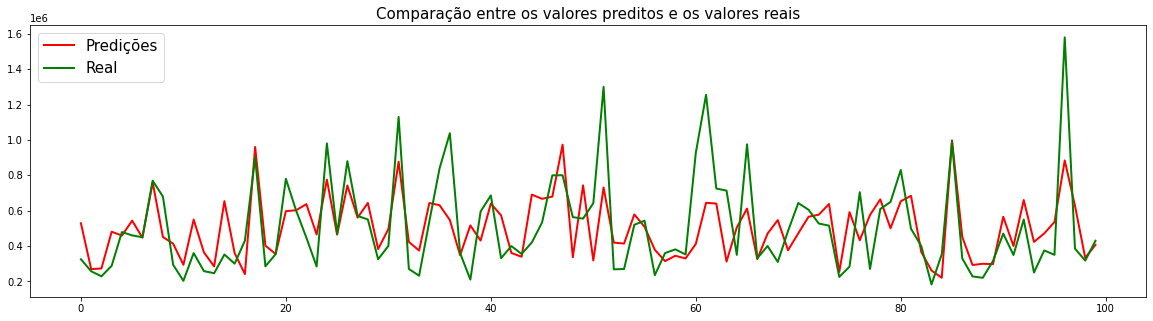

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x3[:100], linewidth=2, color='r')
plt.plot(x4[:100], linewidth=2,color='g')
plt.title('Comparação entre os valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

Nas métricas de avaliação vemos que o $R^2$ ficou semelhante ao resultado anterior, dessa forma, inicialmente, podemos descartar a presença de *overfitting*.

In [ ]:
print('O erro médio absoluto é :',mean_absolute_error(y_treino,regressor.predict(X_treino)))
print('O erro médio quadrado é :',mean_squared_error(y_treino,regressor.predict(X_treino)))
print('O erro mediano absoluto é :',median_absolute_error(y_treino,regressor.predict(X_treino)))
print('O R quadrado é :',r2_score(y_treino,regressor.predict(X_treino)))

O erro médio absoluto é : 163311.39869776604
O erro médio quadrado é : 71716489801.45435
O erro mediano absoluto é : 116991.671875
O R quadrado é : 0.4510734720614953


Vamos plotar o gráfico *scatterplot* para comparar o real e o predito.

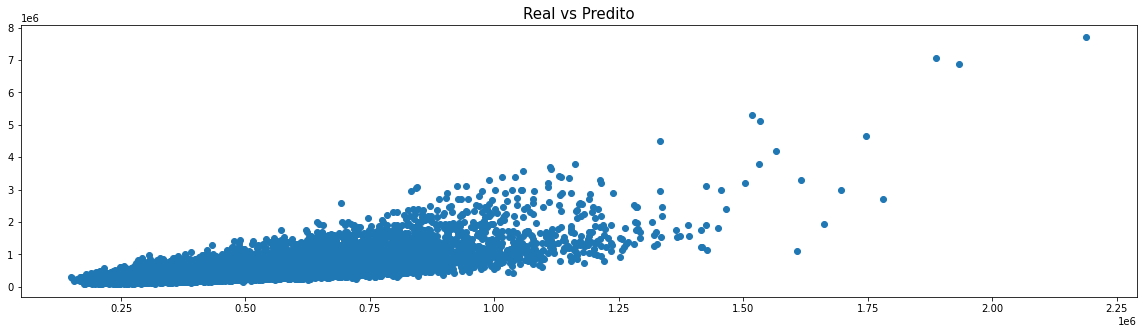

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Real vs Predito",size=15)
plt.scatter(x3,x4);

## Validação Cruzada

Agora vamos fazer a validação cruzada do nosso modelo.

Vamos criar uma função e inserir nela a estrutura da nossa rede neural.

In [ ]:
def RedeNeural():
  regressor=Sequential()
  regressor.add(Dense(units=5, activation='relu',input_dim=8))
  regressor.add(Dense(units=5, activation='relu'))
  regressor.add(Dense(units=1,activation='linear'))
  regressor.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

  return regressor

Criada nossa função vamos aplicar a *cross validation*.

In [ ]:
regressor_cv = KerasRegressor(build_fn=RedeNeural, epochs=100, batch_size=300)
resultados = cross_val_score(estimator=regressor_cv, X=X, y=y, cv=10)

Epoch 1/100
65/65 [==============================] - 0s 1ms/step - loss: 541089.3750 - mean_absolute_error: 541089.3750
Epoch 2/100
65/65 [==============================] - 0s 992us/step - loss: 540979.2500 - mean_absolute_error: 540979.2500
Epoch 3/100
65/65 [==============================] - 0s 1ms/step - loss: 540920.1250 - mean_absolute_error: 540920.1250
Epoch 4/100
65/65 [==============================] - 0s 1ms/step - loss: 540885.2500 - mean_absolute_error: 540885.2500
Epoch 5/100
65/65 [==============================] - 0s 989us/step - loss: 540860.1875 - mean_absolute_error: 540860.1875
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 540831.3750 - mean_absolute_error: 540831.3750
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 540774.3125 - mean_absolute_error: 540774.3125
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 540594.5000 - mean_absolute_error: 540594.5000
Epoch 9/100
65/65 [=================

Agora vamos visualizar os resultados.

In [ ]:
resultados

array([-161854.890625, -169653.109375, -159445.84375 , -164086.4375  ,
       -153622.140625, -159592.125   , -162241.859375, -164822.4375  ,
       -165382.203125, -177824.296875])

Vemos que a média dos resultados ficaram próximos dos resultaddos que já víamos conseguindo com o nosso modelo.

In [ ]:
resultados.mean()

-163852.534375

E o desvio padrão.

In [ ]:
resultados.std()

6172.5841266859725

## Conclusão

Nesse projeto aplicamos redes neurais para modelagem de preços. Uma coisa que não realizamos foi o *GridSearch* do modelo, mas que será feito em outro *notebook* e esse procedimento é necessário visto que a rede neural não obteve um desempenho tão acurado, entretanto é bom notar que as previsões seguiram próximas dos valores reais.